In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv("/Users/sjb373/data/secure-compression-framework-lib/sjb_local/stats_complete.csv")
data["compression_ratio"] = data.raw_bytes/data.compressed_bytes
data["simple_safe_compression_ratio"] = data.raw_bytes/data.safe_compressed_bytes_simple
data["advanced_safe_compression_ratio"] = data.raw_bytes/data.safe_compressed_bytes_advanced
data["raw_bytes_kb"] = data.raw_bytes/1000
data.head()

,n,m,dist,random_password,raw_bytes,compressed_bytes,safe_compressed_bytes_simple,safe_compressed_bytes_advanced,compression_ratio,simple_safe_compression_ratio,advanced_safe_compression_ratio,raw_bytes_kb
0,2,100,even,True,307379,16222,18981,17092,18.948280,16.194036,17.983794,307.379
1,2,100,random,True,300970,16459,19072,17282,18.286044,15.780726,17.415230,300.970
2,2,100,long_tail,True,265369,15944,18394,16770,16.643816,14.426933,15.824031,265.369
3,2,200,even,True,611560,30669,35596,31752,19.940657,17.180582,19.260519,611.560
4,2,200,random,True,608671,30423,35454,31742,20.006936,17.167908,19.175572,608.671


In [17]:
mdata = data.drop(columns=["compression_ratio", "simple_safe_compression_ratio", "advanced_safe_compression_ratio"]).melt(id_vars=["n", "m", "dist", "random_password"], value_vars=["compressed_bytes", "safe_compressed_bytes_advanced", "safe_compressed_bytes_simple"])
mdata["value_kb"] = mdata.value/1000
mdata.head()

,n,m,dist,random_password,variable,value,value_kb
0,2,100,even,True,compressed_bytes,16222,16.222
1,2,100,random,True,compressed_bytes,16459,16.459
2,2,100,long_tail,True,compressed_bytes,15944,15.944
3,2,200,even,True,compressed_bytes,30669,30.669
4,2,200,random,True,compressed_bytes,30423,30.423


In [18]:
ndata = data.melt(id_vars=["n", "m", "dist", "random_password"], value_vars=["compression_ratio", "simple_safe_compression_ratio", "advanced_safe_compression_ratio"])
ndata["value_kb"] = mdata.value/1000
ndata.head()

,n,m,dist,random_password,variable,value,value_kb
0,2,100,even,True,compression_ratio,18.948280,16.222
1,2,100,random,True,compression_ratio,18.286044,16.459
2,2,100,long_tail,True,compression_ratio,16.643816,15.944
3,2,200,even,True,compression_ratio,19.940657,30.669
4,2,200,random,True,compression_ratio,20.006936,30.423


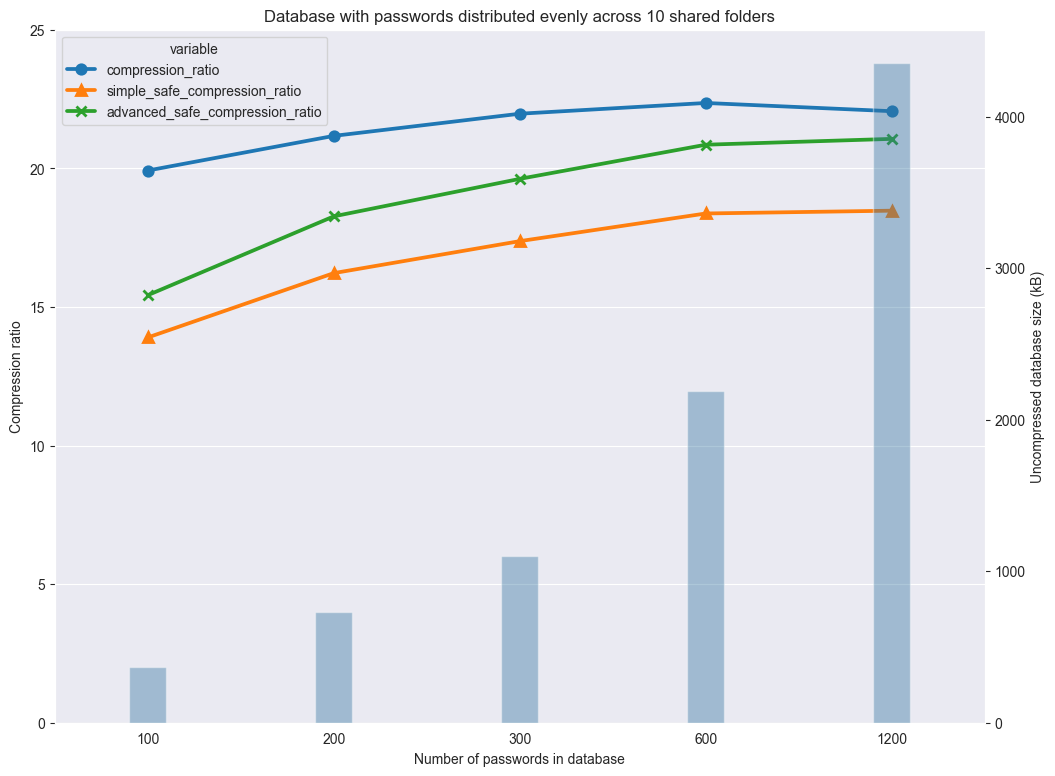

In [32]:
fig = plt.figure(figsize=(12, 9))
ax= fig.gca()
ax2=ax.twinx()
n = 10

# Uncompressed size
sns.barplot(data[(data.dist == "even") & (data.n == n)], x="m", y="raw_bytes_kb", ax=ax2, width=0.2, alpha=0.4)
ax2.set_ylabel("Uncompressed database size (kB)")
ax2.grid(False)

# Compression ratio
sns.pointplot(ndata[(ndata.dist == "even") & (ndata.n == n)], x="m", y="value", hue="variable", markers=["o", "^", "x"], ax=ax)
ax.set_title(f"Database with passwords distributed evenly across {n} shared folders")
ax.set_ybound(0, 25)
ax.set_xlabel("Number of passwords in database")
ax.set_ylabel("Compression ratio")

fig.savefig("m_plot.png")

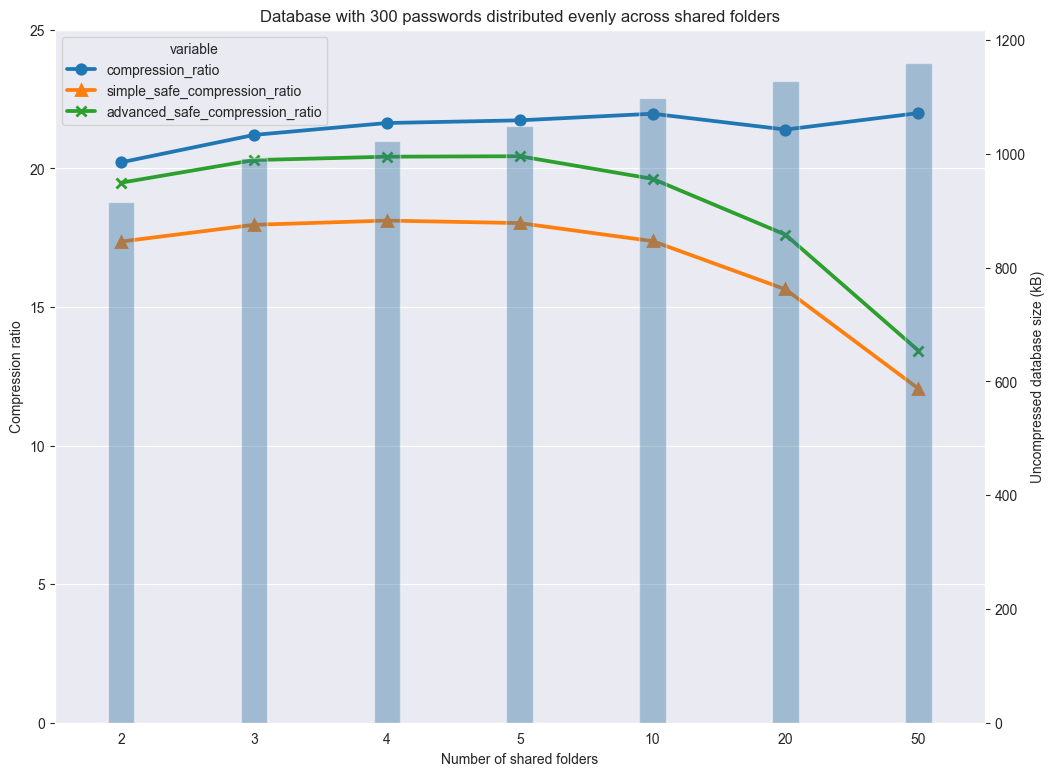

In [33]:
fig = plt.figure(figsize=(12, 9))
ax= fig.gca()
ax2=ax.twinx()
m = 300

# Uncompressed size
sns.barplot(data[(data.dist == "even") & (data.m == m)], x="n", y="raw_bytes_kb", ax=ax2, width=0.2, alpha=0.4)
ax2.set_ylabel("Uncompressed database size (kB)")
ax2.grid(False)

# Compression ratio
sns.pointplot(ndata[(ndata.dist == "even") & (ndata.m == m)], x="n", y="value", hue="variable", markers=["o", "^", "x"], ax=ax)
ax.set_title(f"Database with 300 passwords distributed evenly across shared folders")
ax.set_ybound(0, 25)
ax.set_xlabel("Number of shared folders")
ax.set_ylabel("Compression ratio")

fig.savefig("n_plot.png")

/var/folders/sx/g1wlrwxs6t7gtl90xh8ch7rm0000gp/T/ipykernel_14795/2724381213.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i, j].legend(fontsize="small")
/var/folders/sx/g1wlrwxs6t7gtl90xh8ch7rm0000gp/T/ipykernel_14795/2724381213.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i, j].legend(fontsize="small")


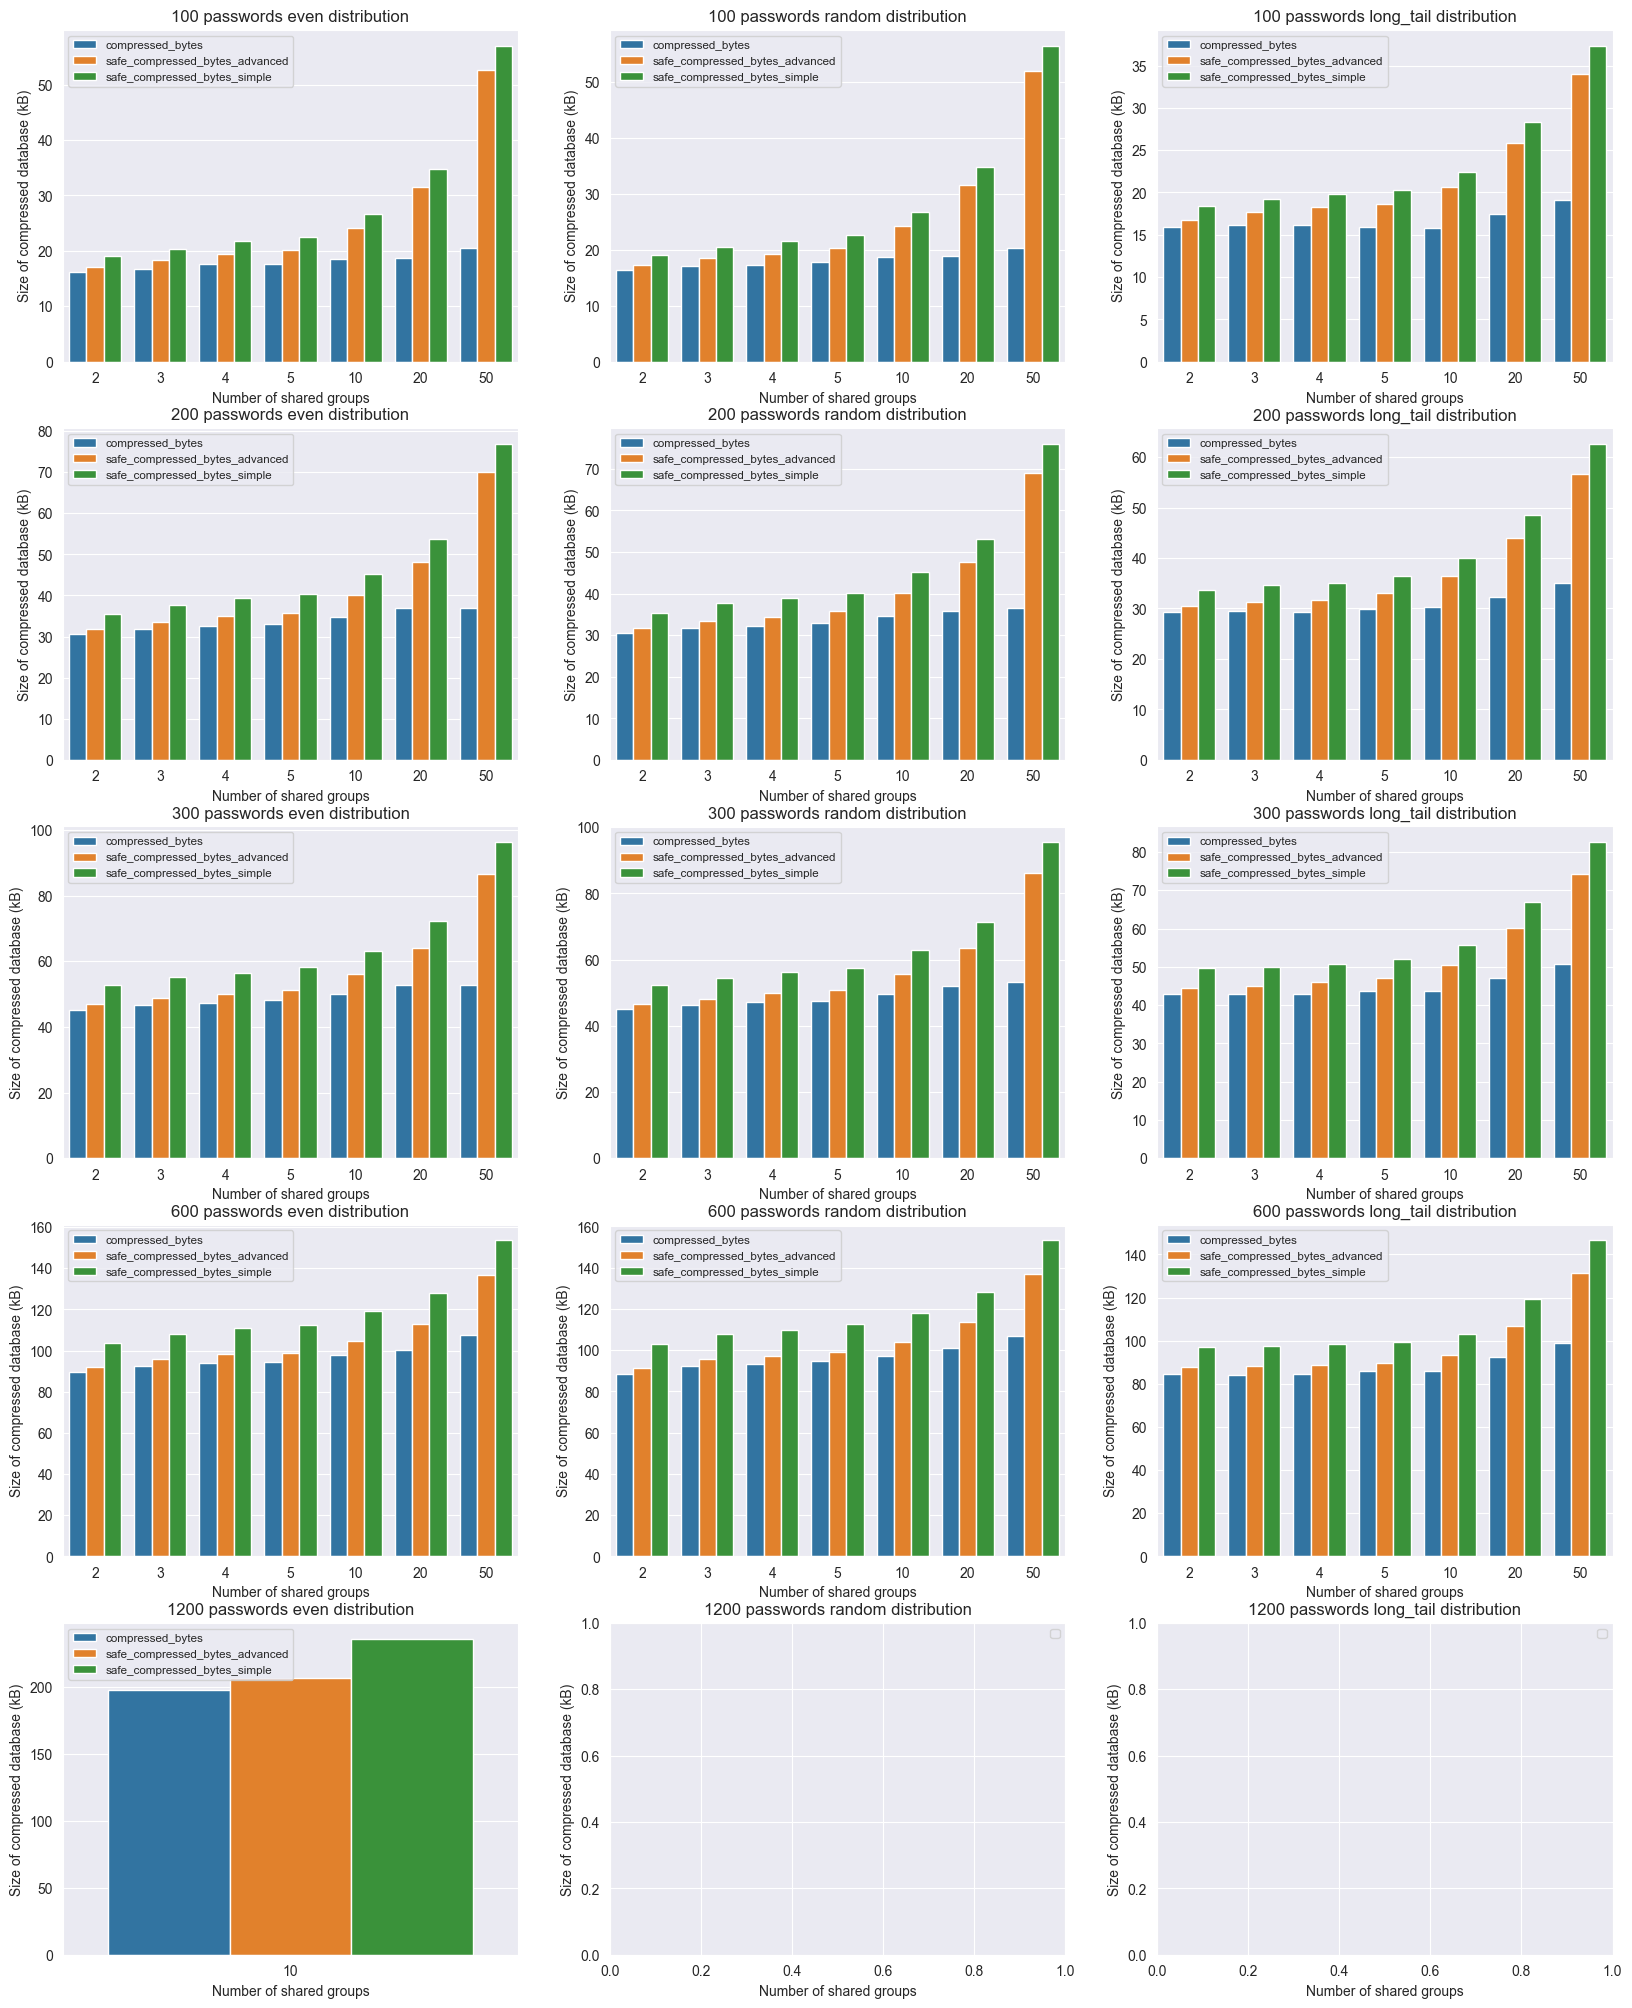

In [20]:
fig, axes = plt.subplots(data.m.nunique(), data.dist.nunique(), figsize=(20, 25))
for i, m in enumerate(data.m.unique()):
    for j, dist in enumerate(data.dist.unique()):
        sns.barplot(mdata[(mdata.m == m) & (mdata.dist == dist)], x="n", y="value_kb", hue="variable", ax=axes[i, j])
        axes[i, j].set_title(f"{m} passwords {dist} distribution")
        axes[i, j].set_xlabel("Number of shared groups")
        axes[i, j].set_ylabel("Size of compressed database (kB)")
        axes[i, j].legend(fontsize="small")
        # axes[i, j].set_ybound(0, 170)
        
plt.savefig("/Users/sjb373/data/secure-compression-framework-lib/sjb_local/stats.png")